In [1]:
import pandas as pd

# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append('../language_processing/')
from preprocess_transcription import Preprocessor
from ontological_processor import OntologicalProcessor
from callsign_matcher import CallsignMatcher

# Loading and Processing the Data

We'll begin by loading the track data

In [2]:
track_data_path = '../flight_data/12-20-21/12-20-21.csv'
command_data_path = '../sample_transcriptions/2021-12-20.json'

track_df = pd.read_csv(track_data_path)

Next we'll load the command data via the preprocessor module, which currently takes in txt log files as an input

In [3]:
proc = Preprocessor(command_data_path, log=False)
command_df = proc.get_transcriptions(15)

In [4]:
command_df

,id,Time,Transcriptions,Length
0,0BD65F98-25BE-4544-A6CC-5EBBA62B217F,1635810863,AMERICAN 919 HEADING 150 JOIN YOUR FINAL CLEAR...,75
16,9F07AD14-3778-4655-BBAE-F6ABECD6D175,1635865001,RIGHT 23000 ENVOY,22
17,C1CD9F24-83D8-464B-8ACC-6BAF0E74FFE5,1635865101,340 JOIN THE FINAL FOR 6206,27
18,298DB293-6443-43A6-9F3F-7F6C8676985B,1635865140,TOWER 2415 ENVOY 3660,21
19,48EA7EF4-6A03-4D25-9D74-B86A2D44E9BB,1635865164,LEFT 220 JOIN FINAL FOR 6,25
...,...,...,...,...
1540,39903A8B-B39D-4B2B-A105-B0F866BBCBCE,1640072039,902 TURN 20 DEGREES RIGHT LEFT TURN TO FINAL,44
1541,1975A9EF-2CC1-4D41-AC4F-BF57E4B722F3,1640072151,JET 776 HEAVY DESCEND AND MAINTAIN 3000,39
1542,16B173B0-738E-4D0D-8EC7-72F8E6D0919D,1640072176,776 HEAVY CLEARED VISUAL APPROACH RUNWAY 18L,44
1543,405580FB-6767-4B76-A600-BB8CBB32097B,1640072229,UNITED 2059 DESCEND AND MAINTAIN 6000,37


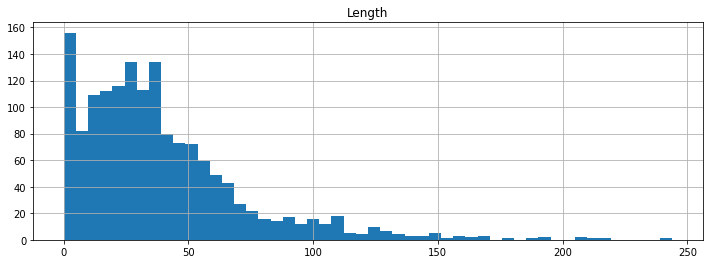

In [5]:
proc.plot_length_distribution()

NOTE: this graph above shows that many commands are only a few words or less, suggesting the transcription quality to be sub-par. These are likely fragments.

Now we'll apply the OntologicalProcessor class to parse through the transcriptions and perform rule-based command recognition

In [6]:
op = OntologicalProcessor()
command_df['altitude'] = command_df['Transcriptions'].apply(op.find_alt)
command_df['heading'] = command_df['Transcriptions'].apply(op.find_turn)
command_df['speed'] = command_df['Transcriptions'].apply(op.find_speed)
command_df['contact'] = command_df['Transcriptions'].apply(op.find_contact)
command_df['clearance'] = command_df['Transcriptions'].apply(op.find_clearance)
command_df['callsign'] = command_df['Transcriptions'].apply(op.find_callsign)

<ipython-input-6-8a2e757ef90e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  command_df['altitude'] = command_df['Transcriptions'].apply(op.find_alt)
<ipython-input-6-8a2e757ef90e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  command_df['heading'] = command_df['Transcriptions'].apply(op.find_turn)
<ipython-input-6-8a2e757ef90e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [7]:
cm = CallsignMatcher(track_data_path)

In [8]:
command_df.head(50)

,id,Time,Transcriptions,Length,altitude,heading,speed,contact,clearance,callsign
0,0BD65F98-25BE-4544-A6CC-5EBBA62B217F,1635810863,AMERICAN 919 HEADING 150 JOIN YOUR FINAL CLEAR...,75,NA,150,NA,False,True,AAL919
16,9F07AD14-3778-4655-BBAE-F6ABECD6D175,1635865001,RIGHT 23000 ENVOY,22,Possibly Missing KW,Missing ST,NA,False,False,NA
17,C1CD9F24-83D8-464B-8ACC-6BAF0E74FFE5,1635865101,340 JOIN THE FINAL FOR 6206,27,NA,NA,NA,False,False,NA
18,298DB293-6443-43A6-9F3F-7F6C8676985B,1635865140,TOWER 2415 ENVOY 3660,21,NA,NA,NA,True,False,ENY3660
19,48EA7EF4-6A03-4D25-9D74-B86A2D44E9BB,1635865164,LEFT 220 JOIN FINAL FOR 6,25,NA,220,NA,False,False,NA
20,85D7334A-8CBC-4CF1-A997-9D2A526312A5,1635865178,090 AMERICAN 356,16,NA,NA,NA,False,False,AAL356
21,7D4DB8B8-0B98-4FEE-8CA7-CE31DCABE814,1635865238,170 OR BETTER TO PARKING AMERICAN 6,35,NA,NA,NA,False,False,AAL6
22,FB01D396-36DC-4575-9E04-DB56E044F134,1635865261,AMERICAN 2195 OUT OF,25,NA,NA,NA,False,False,AAL2195
24,552D8E30-9995-4898-B9EB-DD19BB5DB2B9,1635865280,3000 TILL ESTABLISHED WERE CLEARED FOR THE RNA...,77,Possibly Missing KW,Missing ST,NA,False,True,AAL356
25,0DB2249D-BC84-40CE-BD51-B9BD0645E32C,1635865297,TOWER AMERICAN 1360,19,NA,NA,NA,True,False,AAL1360


In [9]:
command_df

,id,Time,Transcriptions,Length,altitude,heading,speed,contact,clearance,callsign
0,0BD65F98-25BE-4544-A6CC-5EBBA62B217F,1635810863,AMERICAN 919 HEADING 150 JOIN YOUR FINAL CLEAR...,75,NA,150,NA,False,True,AAL919
16,9F07AD14-3778-4655-BBAE-F6ABECD6D175,1635865001,RIGHT 23000 ENVOY,22,Possibly Missing KW,Missing ST,NA,False,False,NA
17,C1CD9F24-83D8-464B-8ACC-6BAF0E74FFE5,1635865101,340 JOIN THE FINAL FOR 6206,27,NA,NA,NA,False,False,NA
18,298DB293-6443-43A6-9F3F-7F6C8676985B,1635865140,TOWER 2415 ENVOY 3660,21,NA,NA,NA,True,False,ENY3660
19,48EA7EF4-6A03-4D25-9D74-B86A2D44E9BB,1635865164,LEFT 220 JOIN FINAL FOR 6,25,NA,220,NA,False,False,NA
...,...,...,...,...,...,...,...,...,...,...
1540,39903A8B-B39D-4B2B-A105-B0F866BBCBCE,1640072039,902 TURN 20 DEGREES RIGHT LEFT TURN TO FINAL,44,NA,20turn,NA,False,False,NA
1541,1975A9EF-2CC1-4D41-AC4F-BF57E4B722F3,1640072151,JET 776 HEAVY DESCEND AND MAINTAIN 3000,39,3000,NA,NA,False,False,NA
1542,16B173B0-738E-4D0D-8EC7-72F8E6D0919D,1640072176,776 HEAVY CLEARED VISUAL APPROACH RUNWAY 18L,44,NA,NA,NA,False,True,NA
1543,405580FB-6767-4B76-A600-BB8CBB32097B,1640072229,UNITED 2059 DESCEND AND MAINTAIN 6000,37,6000,NA,NA,False,False,NA


# Processing Data

In [36]:
# Create function which processes altitude
# Input: track data frame for callsign, time
# Output: time it takes to reach altitude w/ tolearnce (NA if never reached)

def change_altitude_time(df_track, input_row, tolerance=500):
    filtered_track = df_track[df_track['time_position']>input_row['Time']]

    for index, row in filtered_track.iterrows():
        print(row['baro_altitude'])
        if (float(row['baro_altitude'])*3.28084 > float(input_row['altitude']) - tolerance) and (float(row['baro_altitude']) < float(input_row['altitude'])*3.28084 + tolerance):
            return row['time_position']-input_row['Time']
    return 'Not Reached'

In [35]:
# Create function which processes heading
# Input: track data frame for callsign, time
# Output: time it takes to reach heading (NA if never reached)

# NOTE: this only accounts for change heading commands and doesn't account for anything 

def change_heading_time(df_track, input_row, tolerance=20):
    filtered_track = df_track[df_track['time_position']>input_row['Time']]

    for index, row in filtered_track.iterrows():
        if (int(row['heading']) > int(input_row['heading']) - tolerance) and (int(row['heading']) < input_row['heading'] + tolerance):
            return row['time_position']-input_row['Time']
    return 'Not Reached'

In [37]:
# Create function which processes speed
# Input: track data frame for callsign, time
# Output: time it takes to reach speed w/ tolerance (NA if never reached)

def change_speed_time(df_track, input_row, tolerance=50):
    filtered_track = df_track[df_track['time_position']>input_row['Time']]

    for index, row in filtered_track.iterrows():
        if (int(row['velocity']) > int(input_row['speed']) - tolerance) and (int(row['velocity']) < input_row['speed'] + tolerance):
            return row['time_position']-input_row['Time']
    return 'Not Reached'

In [38]:
# Create a function which takes in callsign and creates a DF of commands.
# Maybe filter for those w/ more than one command???
# Create a new dataframe of track data for that callsign 
# Loop through command DF starting from the top
# If find any alt, heading, or speed command, call respective function

def data_extractor(callsign):
    # Create a new data frame of commands for a callsign
    df_commands = command_df[command_df['callsign'] == callsign]
    # Create a new dataframe of track data for that callsign 
    df_track = track_df[track_df['callsign'].str.contains(callsign, na=False)]

    altitude_times = []
    heading_times = []
    speed_times = []

    # Loop through command DF starting from the top
    for index, row in df_commands.iterrows():
        # If find any alt, heading, or speed command, call respective function
        try:
            int(row['altitude'])
            altitude_times.append(change_altitude_time(df_track, row))
        except:
            altitude_times.append('No Command')
        try:
            int(row['heading'])
            heading_times.append(change_heading_time(df_track, row))
        except:
            heading_times.append('No Command')
        try:
            int(row['speed'])
            speed_times.append(change_speed_time(df_track, row))
        except:
            speed_times.append('No Command')

    df_commands['altitude_time'] = altitude_times
    df_commands['heading_time'] = heading_times
    df_commands['speed_time'] = speed_times

    return df_commands
        

# Processing Response Times

In [25]:
matched_callsigns = command_df.apply(lambda x: cm.find_match(callsign=x['callsign'], threshold=None, t=x['Time'], c=1200), axis=1).unique()

(array([21], dtype=int64),)
(array([  4,  34, 120], dtype=int64),)
(array([69], dtype=int64),)
(array([31], dtype=int64),)
(array([69], dtype=int64),)
(array([ 43,  53, 170], dtype=int64),)
(array([ 43,  53, 170], dtype=int64),)
(array([ 32, 170], dtype=int64),)
(array([ 42,  52, 170], dtype=int64),)
(array([ 42,  52, 170], dtype=int64),)
(array([ 32, 170], dtype=int64),)
(array([ 32, 170], dtype=int64),)
(array([ 32, 103], dtype=int64),)
(array([ 42,  52, 170], dtype=int64),)
(array([ 42,  52, 170], dtype=int64),)
(array([66], dtype=int64),)
(array([66], dtype=int64),)
(array([66], dtype=int64),)
(array([66], dtype=int64),)
(array([66], dtype=int64),)
(array([66], dtype=int64),)
(array([66], dtype=int64),)
(array([66], dtype=int64),)
(array([66], dtype=int64),)
(array([66], dtype=int64),)
(array([ 30, 270], dtype=int64),)
(array([17], dtype=int64),)
(array([17], dtype=int64),)
(array([17], dtype=int64),)
(array([17], dtype=int64),)
(array([17], dtype=int64),)
(array([17], dtype=int64)

In [40]:
times_df = pd.DataFrame()

for callsign in matched_callsigns:
    times_df = times_df.append(data_extractor(callsign))

<ipython-input-38-16f71f0e5fb6>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commands['altitude_time'] = altitude_times
<ipython-input-38-16f71f0e5fb6>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commands['heading_time'] = heading_times
<ipython-input-38-16f71f0e5fb6>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [43]:
times_df.head(50)

,id,Time,Transcriptions,Length,altitude,heading,speed,contact,clearance,callsign,altitude_time,heading_time,speed_time
16,9F07AD14-3778-4655-BBAE-F6ABECD6D175,1635865001,RIGHT 23000 ENVOY,22,Possibly Missing KW,Missing ST,NA,False,False,NA,No Command,No Command,No Command
17,C1CD9F24-83D8-464B-8ACC-6BAF0E74FFE5,1635865101,340 JOIN THE FINAL FOR 6206,27,NA,NA,NA,False,False,NA,No Command,No Command,No Command
19,48EA7EF4-6A03-4D25-9D74-B86A2D44E9BB,1635865164,LEFT 220 JOIN FINAL FOR 6,25,NA,220,NA,False,False,NA,No Command,Not Reached,No Command
26,E0CC8F5F-F0FC-41AA-8D19-A746E02949CB,1635865344,APPROACH AMERICAN DESCENDING OUT OF 12 FOR 41...,87,Missing ST,NA,NA,False,False,NA,No Command,No Command,No Command
33,B665212A-F079-43BC-9AD4-19541498052E,1635865520,DESCENDING 5000 AMERICAN,30,5000,NA,NA,False,False,NA,Not Reached,No Command,No Command
36,6A2F9F7A-F665-4ED5-9FFF-1B029360AD91,1635865577,536 LEFT 1000 AMERICAN,22,Possibly Missing KW,Missing ST,NA,False,False,NA,No Command,No Command,No Command
37,70B2CE7A-2479-4E7B-8D69-5CBA8325D4D6,1635865581,EXEC JET 454 TURN 10 DEGREES RIGHT AND RIGHT A...,53,NA,10right,NA,False,False,NA,No Command,No Command,No Command
40,A4C6D052-1BB3-41B2-8B45-E58D3D574C37,1635865612,090 AMERICAN,18,NA,NA,NA,False,False,NA,No Command,No Command,No Command
41,B59DE52D-05CC-43BA-B5A2-5E3F42BFA0BC,1635865637,AND 4004 AMERICAN EXEC JET 454 DESCEND MAINTA...,79,3000,NA,NA,False,False,NA,Not Reached,No Command,No Command
42,B78CD6DD-46D9-4320-A434-ABB50B1B9B8D,1635865650,190 AMERICAN,18,NA,NA,NA,False,False,NA,No Command,No Command,No Command
